In [1]:
import tensorflow as tf
import keras
from draw_candle_image import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta.trend
from ta import add_all_ta_features
from ta.utils import dropna
import ta
import ta.momentum
import json
from common_train_utils import *
from functools import partial
from keras.models import load_model
from matplotlib.dates import DateFormatter

In [2]:
dataset_folder = "./vnindex_dataset_12_2_3_2014_2024_test_2022_2023_2024"

In [3]:
config = read_config(dataset_folder)
candle_type_and_directory_save: dict = config["candle_type_and_directory_save"]
previous_days = config["previous_days"]
next_days = config["next_days"]
days_result = config["days_result"]

In [4]:
dataset_test = load_dataset_test(dataset_folder)

In [5]:
for images, labels in dataset_test.take(1):
    print(images.shape)
    print(labels.shape)
    

(287, 287, 3)
(18, 4)


In [6]:
image_shape = tuple(images.shape)

In [7]:
image_shape

(287, 287, 3)

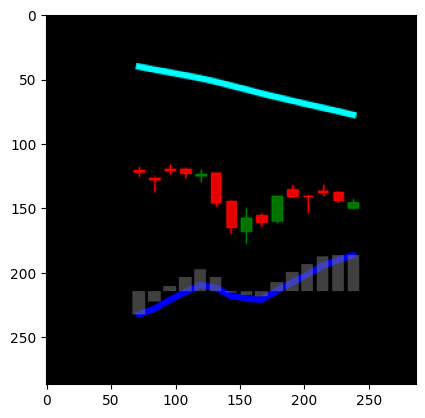

In [8]:
plt.imshow(images)

In [9]:
len(dataset_test)

102

In [10]:
dataset_train = load_dataset_train(dataset_folder, candle_type_and_directory_save)

folder: bullish_engulfing, 		 total: 87 images
folder: bearish_engulfing, 		 total: 79 images
folder: star_doji, 		 total: 0 images
folder: dragonfly_doji, 		 total: 0 images
folder: gravestone_doji, 		 total: 0 images
folder: morning_star, 		 total: 25 images
folder: evening_star, 		 total: 48 images
folder: hammer, 		 total: 32 images
folder: inverted_hammer, 		 total: 45 images
folder: harami_down, 		 total: 66 images
folder: harami_up, 		 total: 87 images
folder: tweezer_top, 		 total: 46 images
folder: tweezer_bottom, 		 total: 42 images
folder: marubozu, 		 total: 95 images
folder: spin, 		 total: 51 images
folder: next_3_day_up, 		 total: 313 images
folder: next_3_day_down, 		 total: 290 images


In [11]:
len(dataset_train)

1306

In [12]:
dataset_train_1 = dataset_train.batch(32)
dataset_test_1 = dataset_test.batch(32)

In [13]:
get_close_feature = partial(up_or_down_in_close, days_result)
dataset_train_2 = dataset_train_1.map(get_close_feature)
dataset_test_2 = dataset_test_1.map(get_close_feature)

In [14]:
# model_1.save(f"{dataset_folder}/model_1.keras")
model_1 = load_model(f"{dataset_folder}/model_10_1.keras")

In [15]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 286, 286, 8)    │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 143, 143, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 141, 141, 8)    │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 70, 70, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 39200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,254,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 3, 64)          │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 3, 1)           │            65 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,843,220 (14.66 MB)

 Trainable params: 1,281,073 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,562,147 (9.77 MB)

In [16]:
loss, mae = model_1.evaluate(dataset_test_2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2503 - mean_absolute_error: 0.4914


In [17]:
loss

0.24967661499977112

In [18]:
mae

0.4908425509929657

In [19]:
prediction_for_test = model_1.predict(dataset_test_2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


In [20]:
prediction_for_test

array([[[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
        [0.5958357],
        [0.5968727]],

       [[0.5890699],
    

In [21]:
all_y_dataset_test_1 = [y.numpy() for _, y in dataset_test_1]
y_dataset_test_1 = all_y_dataset_test_1[0]
for y in all_y_dataset_test_1[1:]:
    y_dataset_test_1 = np.concatenate([y_dataset_test_1, y], axis=0)
    
all_x_dataset_test_1 = [x.numpy() for x, _ in dataset_test_1]
x_dataset_test_1 = all_x_dataset_test_1[0]
for x in all_x_dataset_test_1[1:]:
    x_dataset_test_1 = np.concatenate([x_dataset_test_1, x], axis=0)

In [22]:
all_y_dataset_test_2 = [y.numpy() for _, y in dataset_test_2]
y_dataset_test_2 = all_y_dataset_test_2[0]
for y in all_y_dataset_test_2[1:]:
    y_dataset_test_2 = np.concatenate([y_dataset_test_2, y], axis=0)
    
all_x_dataset_test_2 = [x.numpy() for x, _ in dataset_test_2]
x_dataset_test_2 = all_x_dataset_test_2[0]
for x in all_x_dataset_test_2[1:]:
    x_dataset_test_2 = np.concatenate([x_dataset_test_2, x], axis=0)

In [23]:
y_dataset_test_1.shape

(102, 18, 4)

In [24]:
x_dataset_test_1.shape

(102, 287, 287, 3)

In [25]:
prediction_for_test[0].reshape(1,-1)[0]

array([0.5890699, 0.5958357, 0.5968727], dtype=float32)

In [26]:
def check_last_candle_is_up_or_down(df: pd.DataFrame, day_result):
    open = df.iloc[-day_result, 1]
    close = df.iloc[-day_result, 2]
    
    if open <= close:
        return "up"
    
    return "down"

In [27]:
def draw_prediction(
    x_dataset_test_1_i, 
    y_dataset_test_1_i, 
    predictions_i, 
    show_x_orginal_candle=False, 
    show_original_candle=False,
    show_prediction_candle=False,
    show_close_compare=False,
    show_open_compare=False,
    type_of_output=None,
    draw_beside=False,
    save_image=None,
    print_image=True
    ):
    
    if show_x_orginal_candle and not draw_beside:
        plt.imshow(x_dataset_test_1_i)
    
    df_real_data = pd.DataFrame(y_dataset_test_1_i, columns=["High", "Open", "Close", "Low"])
    
    mc = mpf.make_marketcolors(
    up='green', down='red', wick='inherit', edge='inherit', volume='inherit', )
    style = mpf.make_mpf_style(marketcolors=mc, figcolor="white")
    
    df_real_data['Date'] = pd.date_range(start='2023-01-01', periods=len(df_real_data), freq='D')
    df_real_data.set_index('Date', inplace=True)
    
    if show_original_candle and not draw_beside:
        fig, axlist = mpf.plot(
            df_real_data,
            type='candle',
            style=style,
            volume=False,  # Hiển thị khối lượng
            axisoff=False,  # Bỏ trục x và y
            returnfig=True,  # Trả về đối tượng Figure để tùy chỉnh
            figratio=(5, 5),  # Điều chỉnh tỷ lệ khung hình để thu hẹp khoảng cách
            figscale=1,  # Tăng kích thước biểu đồ để làm các nến gần nhau hơn
            panel_ratios=[6],
            title="Biểu đồ giá cổ phiếu thực tế",
        )
    
    df_predictions = df_real_data.copy()
    
    
    if type_of_output == "close":
        last_close_in_x_original_candle = df_predictions.iloc[-days_result-1, 2]
        df_predictions.iloc[-days_result:, 2] = (predictions_i.reshape(1,-1)[0]) * last_close_in_x_original_candle / 100 + last_close_in_x_original_candle
    elif type_of_output == "high_and_low":
        last_high_and_low_in_original_candle = y_dataset_test_1_i[-days_result-1, [0, 3]]
        df_predictions.iloc[-days_result:, [0, 3]] = (predictions_i.reshape(1,-1)[0]) * last_high_and_low_in_original_candle / 100 + last_high_and_low_in_original_candle
    elif type_of_output == "open_and_close":
        for day_result in range(days_result, 0, -1):
            is_real_up = check_last_candle_is_up_or_down(df_real_data, day_result) == "up"
            open_close_real_before = df_predictions.iloc[-day_result-1, [1, 2]]
            max_in_open_close_real_before = np.max(open_close_real_before)
            min_in_open_close_real_before = np.min(open_close_real_before)
            
            if days_result == 1:
                percent_predict = predictions_i
            else:
                percent_predict = predictions_i[-day_result]
            
            swaped = [max_in_open_close_real_before, min_in_open_close_real_before]
            result = (percent_predict * swaped) / 100 + swaped
            
            max_in_result = np.max(result)
            min_in_result = np.min(result)
            
            if is_real_up:
                df_predictions.iloc[-day_result:, [1, 2]] = [min_in_result, max_in_result]
            else:
                df_predictions.iloc[-day_result:, [1, 2]] = [max_in_result, min_in_result]
            df_predictions.iloc[-days_result:, [0, 3]] = [max_in_result, min_in_result]
    elif type_of_output == "max_in_open_and_close":
        for day_result in range(days_result, 0, -1):
            is_real_up = check_last_candle_is_up_or_down(df_real_data, day_result) == "up"
            open_close_real_before = df_predictions.iloc[-day_result-1, [1, 2]]
            max_in_open_close_real_before = np.max(open_close_real_before)
            min_in_open_close_real_before = np.min(open_close_real_before)
            
            if days_result == 1:
                percent_predict = predictions_i
            else:
                percent_predict = predictions_i[-day_result]
            
            swaped = [max_in_open_close_real_before]
            result = (percent_predict * swaped) / 100 + swaped
            
            max_in_result = np.max(result)
            
            if is_real_up:
                df_predictions.iloc[-day_result:, [2]] = [max_in_result]
            else:
                df_predictions.iloc[-day_result:, [1]] = [max_in_result]

    else:
        last_close_in_x_original_candle = df_predictions.iloc[-days_result-1, 2]
        df_predictions.iloc[-days_result:] = (predictions_i.reshape(1,-1)[0]) * last_close_in_x_original_candle / 100 + last_close_in_x_original_candle
    
    if show_prediction_candle and not draw_beside:
        fig, axlist = mpf.plot(
            df_predictions,
            type='candle',
            style=style,
            volume=False,  # Hiển thị khối lượng
            axisoff=False,  # Bỏ trục x và y
            returnfig=True,  # Trả về đối tượng Figure để tùy chỉnh
            figratio=(5, 5),  # Điều chỉnh tỷ lệ khung hình để thu hẹp khoảng cách
            figscale=1,  # Tăng kích thước biểu đồ để làm các nến gần nhau hơn
            panel_ratios=[6],
            title="Biểu đồ giá cổ phiếu dự đoán",
        )
    
    if show_close_compare and not draw_beside:
        fig = plt.figure(figsize=(10, 6))
        plt.plot(df_real_data.index, df_real_data["Close"], color='blue', marker='o', linestyle='-', label='Giá đóng cửa thật')
        plt.plot(df_real_data.index, df_predictions["Close"], color='orange', marker='x', linestyle='--', label='Giá đóng cửa dự đoán')
        plt.title('Biểu đồ Giá Đóng cửa')
        plt.xlabel('Ngày')
        plt.ylabel('Giá Đóng cửa')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    if show_open_compare and not draw_beside:
        fig = plt.figure(figsize=(10, 6))
        plt.plot(df_real_data.index, df_real_data["Open"], color='blue', marker='o', linestyle='-', label='Giá mở cửa thật')
        plt.plot(df_real_data.index, df_predictions["Open"], color='orange', marker='x', linestyle='--', label='Giá mở cửa dự đoán')
        plt.title('Biểu đồ Giá Đóng cửa')
        plt.xlabel('Ngày')
        plt.ylabel('Giá Đóng cửa')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    
    # Tạo Figure và hai Subplots cạnh nhau
    if draw_beside:
        fig, ((ax0, ax00), (ax1, ax2), (ax3, ax4)) = plt.subplots(3, 2, figsize=(12, 12))
        
        
        ax0.set_title("Biểu đồ giá đầu vào")
        ax1.set_title("Biểu đồ giá cổ phiếu thực tế")
        ax2.set_title(f"Biểu đồ giá cổ phiếu dự đoán cho {days_result} ngày cuối của đồ thị")
        ax3.set_title("Biểu đồ giá đóng cửa")
        ax4.set_title("Biểu đồ giá mở cửa")
        
        ax0.imshow(x_dataset_test_1_i)
        mpf.plot(
            df_real_data,
            type='candle',
            style=style,
            volume=False,  # Hiển thị khối lượng
            axisoff=False,  # Bỏ trục x và y
            returnfig=True,  # Trả về đối tượng Figure để tùy chỉnh
            # figratio=(5, 5),  # Điều chỉnh tỷ lệ khung hình để thu hẹp khoảng cách
            # figscale=1,  # Tăng kích thước biểu đồ để làm các nến gần nhau hơn
            # panel_ratios=[6],
            # title="Biểu đồ giá cổ phiếu thực tế",
            ax=ax1
        )
        mpf.plot(
            df_predictions,
            type='candle',
            style=style,
            volume=False,  # Hiển thị khối lượng
            axisoff=False,  # Bỏ trục x và y
            returnfig=True,  # Trả về đối tượng Figure để tùy chỉnh
            # figratio=(5, 5),  # Điều chỉnh tỷ lệ khung hình để thu hẹp khoảng cách
            # figscale=1,  # Tăng kích thước biểu đồ để làm các nến gần nhau hơn
            # panel_ratios=[6],
            # title="Biểu đồ giá cổ phiếu dự đoán",
            ax=ax2
        )
        
        ax3.plot(df_real_data.index, df_real_data["Close"], color='blue', marker='o', linestyle='-', label='Giá đóng cửa thật')
        ax3.plot(df_real_data.index, df_predictions["Close"], color='orange', marker='x', linestyle='--', label=f'Giá đóng cửa dự đoán cho {days_result} ngày cuối')
        # ax3.title('Biểu đồ Giá Đóng cửa')
        # ax3.xlabel('Ngày')
        # ax3.ylabel('Giá Đóng cửa')
        ax3.legend()
        ax3.grid(True)
        
        ax4.plot(df_real_data.index, df_real_data["Open"], color='blue', marker='o', linestyle='-', label='Giá mở cửa thật')
        ax4.plot(df_real_data.index, df_predictions["Open"], color='orange', marker='x', linestyle='--', label=f'Giá mở cửa dự đoán cho {days_result} ngày cuối')
        # ax4.title('Biểu đồ Giá Đóng cửa')
        # ax4.xlabel('Ngày')
        # ax4.ylabel('Giá Đóng cửa')
        ax4.legend()
        ax4.grid(True)
        
        date_format = DateFormatter('%b-%d')
        for ax in [ax1, ax2, ax3, ax4]:
            ax.xaxis.set_major_formatter(date_format)
        
        plt.tight_layout()
        if save_image is not None:
            plt.savefig(save_image)
        
        if print_image:
            plt.show()
        else:
            plt.close(fig)
        
        


In [28]:
y_dataset_test_1.shape

(102, 18, 4)

real: [[0]
 [0]
 [1]]
prediction: [[0.5890699]
 [0.5958357]
 [0.5968727]]


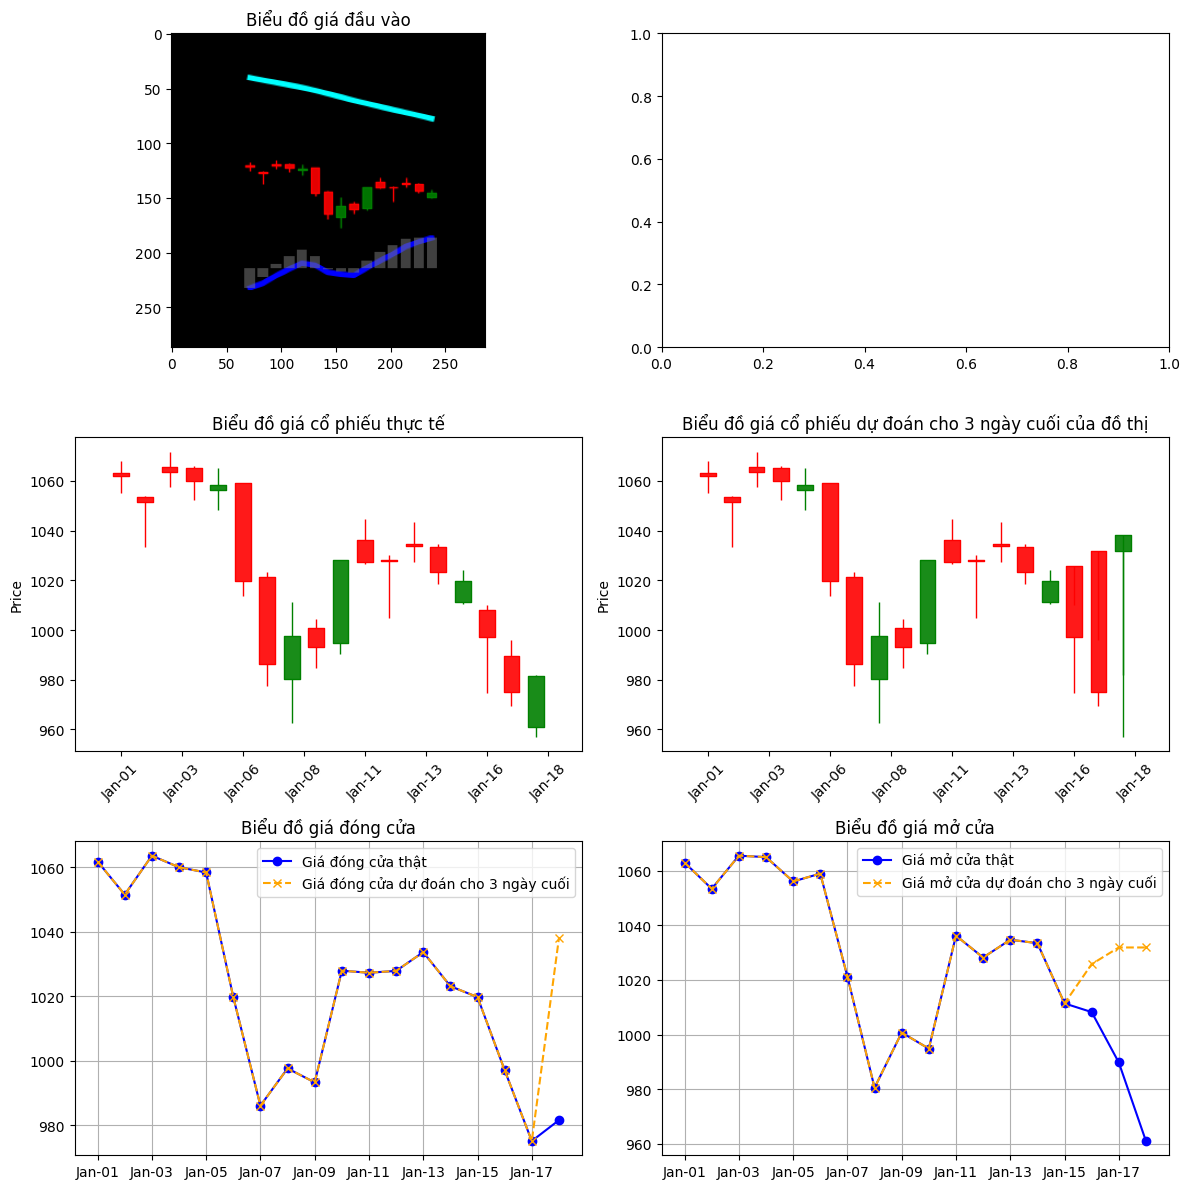

In [29]:
index = 0
print(f"real: {y_dataset_test_2[index]}")
print(f"prediction: {prediction_for_test[index]}")
draw_prediction(
    x_dataset_test_1[index], 
    y_dataset_test_1[index], 
    prediction_for_test[index], 
    show_x_orginal_candle=True,
    show_prediction_candle=True, 
    show_original_candle=True,
    show_close_compare=True,
    show_open_compare=True,
    type_of_output="max_in_open_and_close",
    draw_beside=True,
    # save_image=f"{dataset_folder}_output_prediction_image/predict_{index}.png",
    print_image=True)

real: [[0]
 [0]
 [1]]
prediction: [[0.5890699]
 [0.5958357]
 [0.5968727]]
real: [[0]
 [1]
 [1]]
prediction: [[0.5890699]
 [0.5958357]
 [0.5968727]]
real: [[1]
 [1]
 [0]]
prediction: [[0.5890699]
 [0.5958357]
 [0.5968727]]
real: [[1]
 [0]
 [1]]
prediction: [[0.5890699]
 [0.5958357]
 [0.5968727]]
real: [[0]
 [1]
 [0]]
prediction: [[0.5890699]
 [0.5958357]
 [0.5968727]]
real: [[1]
 [0]
 [0]]
prediction: [[0.5890699]
 [0.5958357]
 [0.5968727]]
real: [[0]
 [0]
 [1]]
prediction: [[0.5890699]
 [0.5958357]
 [0.5968727]]
real: [[0]
 [1]
 [1]]
prediction: [[0.5890699]
 [0.5958357]
 [0.5968727]]
real: [[1]
 [1]
 [1]]
prediction: [[0.5890699]
 [0.5958357]
 [0.5968727]]
real: [[1]
 [1]
 [0]]
prediction: [[0.5890699]
 [0.5958357]
 [0.5968727]]
real: [[1]
 [0]
 [0]]
prediction: [[0.5890699]
 [0.5958357]
 [0.5968727]]
real: [[0]
 [0]
 [0]]
prediction: [[0.5890699]
 [0.5958357]
 [0.5968727]]
real: [[0]
 [0]
 [1]]
prediction: [[0.5890699]
 [0.5958357]
 [0.5968727]]
real: [[0]
 [1]
 [1]]
prediction: [[0.

KeyboardInterrupt: 

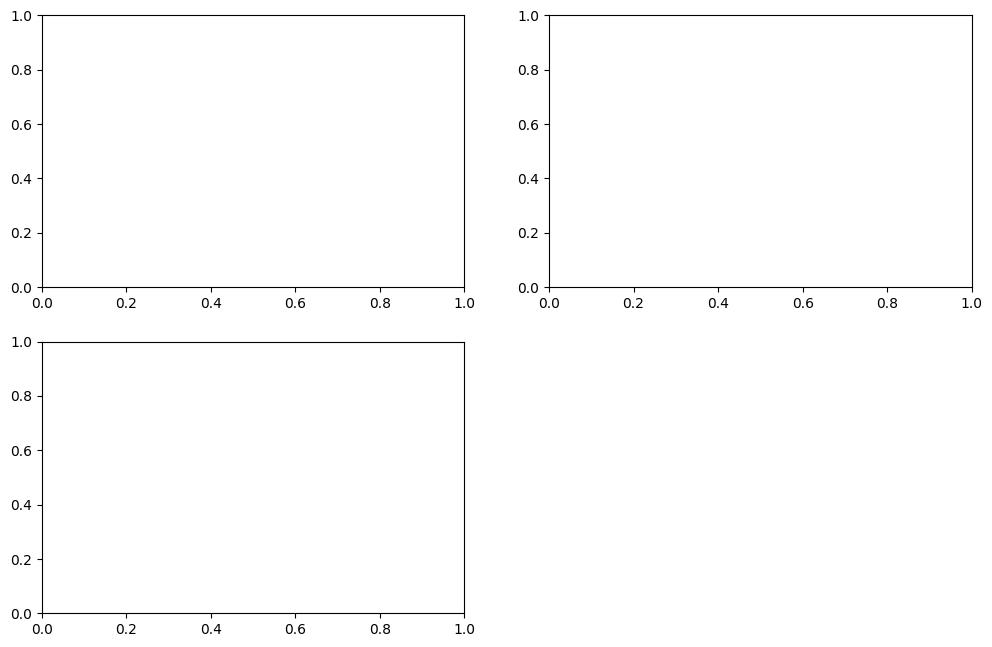

In [30]:
# index = 0
for index in range(len(y_dataset_test_1)):
    print(f"real: {y_dataset_test_2[index]}")
    print(f"prediction: {prediction_for_test[index]}")
    draw_prediction(
        x_dataset_test_1[index], 
        y_dataset_test_1[index], 
        prediction_for_test[index], 
        show_x_orginal_candle=True,
        show_prediction_candle=True, 
        show_original_candle=True,
        show_close_compare=True,
        show_open_compare=True,
        type_of_output="open_and_close",
        draw_beside=True,
        # save_image=f"{dataset_folder}_output_prediction_image_model_1_7_alt/predict_{index}.png",
        print_image=False)